# Heart Disease Prediction

- Hannah Dickescheid (50178)
- Julia Stieler (56040)
- Eva Zinser (53100)
- Carlos Ferrufino (53276)
- Celina Kollwitz (53676)

Heart disease is one of the leading causes of death worldwide, and early detection can be critical for successful treatment. Machine learning has emerged as a powerful tool for predicting the risk of heart disease by analyzing various features such as age, gender, blood pressure, cholesterol level, and smoking habits. In this notebook, we will explore a heart disease dataset and build a machine learning model to predict the likelihood of heart disease based on various patient features.

**_STATE** State FIPS Code\
**FMONTH** File Month\
**IDATE** Interview Date\
**IMONTH** Interview Month\
**IDAY** Interview Day\
**IYEAR** Interview Year\
**DISPCODE** Final Disposition\
**SEQNO** Annual Sequence Number\
**_PSU** Primary Sampling Unit (Equal to Annual Sequence Number)\
**CTELENUM** Correct Telephone Number\
**PVTRESD1** Is it a private residence?\
**COLGHOUS** Do you live in a college housing?\
**STATERES** Do you reside in (state)?
**CELLFON3**  Is this a cellular telephone? (Telephone service over the internet counts as landline service (includes Vonage, Magic 
Jack and other home-based phone services)\
**LADULT** Are you 18 years of age or older?\
**NUMADULT** Number of Adults in Household\
**NUMMEN** Number of Adult Men in Household\
**NUMWOMEN** Number of Adult Women in Household\
**CTELNUM1**  Is this (phone number) ?\
**CELLFON2** Is this a cellular telephone?\
**CADULT** Are you 18 years of age or older\
**PVTRESD2** Do you live in a private residence, that is, not in a dormitory or other type of group living situation?\
**CCLGHOUS**  Do you live in college housing?\



In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, silhouette_score
from sklearn import set_config
set_config(display="diagram")

# Cleaning

In [83]:
data_df = pd.read_csv("data/2015.csv")
data_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [85]:
data_df.shape

(441456, 330)

In [86]:
data_df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [87]:
columns = list(data_df)
columns

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE

In [88]:
missing_values = data_df.isna().sum()
missing_values

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
             ...  
_RFSEAT2         0
_RFSEAT3         0
_FLSHOT6    283502
_PNEUMO2    283502
_AIDTST3     43387
Length: 330, dtype: int64

In [89]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


### Selection of the relevant columns
Research regarding heart disease has identified different important risk factors. We chose these from the dataset. 


In [90]:
# select specific columns
data_df_selected = data_df[['IDATE',
                                         '_MICHD', 
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', 'DIABETE3', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' 
                           ]]

In [91]:
data_df_selected.head()

,IDATE,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,b'01292015',2.0,2.0,1.0,1.0,4018.0,1.0,2.0,3.0,2.0,...,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,b'01202015',2.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,1.0,...,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,b'02012015',NaN,1.0,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,...,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,b'01142015',2.0,2.0,1.0,1.0,2819.0,2.0,2.0,3.0,2.0,...,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,b'01142015',2.0,1.0,2.0,1.0,2437.0,2.0,2.0,3.0,2.0,...,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


In [92]:
# drop missing values
data_df_selected = data_df_selected.dropna()
data_df_selected.shape

(343606, 23)

In [93]:
#Rename the columns to make them more readable
data_df_selected = data_df_selected.rename(columns = {'_MICHD':'HeartDiseaseorAttack', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Vegetables", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

### Process dataset for a machine learning approach

In [94]:
# HeartDiseaseorAttack
#Change 2 to 0 because this means did not have MI or CHD
data_df_selected['HeartDiseaseorAttack'] = data_df_selected['HeartDiseaseorAttack'].replace({2: 0})
data_df_selected.HeartDiseaseorAttack.unique()

array([0., 1.])

In [95]:
#1 HighBP
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
data_df_selected['HighBP'] = data_df_selected['HighBP'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HighBP != 9]
data_df_selected.HighBP.unique()

array([1., 0.])

In [96]:
#2 HighChol
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['HighChol'] = data_df_selected['HighChol'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.HighChol != 7]
data_df_selected = data_df_selected[data_df_selected.HighChol != 9]
data_df_selected.HighChol.unique()

array([1., 0.])

In [97]:
#3 CholCheck
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
data_df_selected['CholCheck'] = data_df_selected['CholCheck'].replace({3:0,2:0})
data_df_selected = data_df_selected[data_df_selected.CholCheck != 9]
data_df_selected.CholCheck.unique()

array([1., 0.])

In [98]:
#4 BMI (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
data_df_selected['BMI'] = data_df_selected['BMI'].div(100).round(0)
data_df_selected.BMI.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [99]:
#5 Smoker
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Smoker'] = data_df_selected['Smoker'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Smoker != 7]
data_df_selected = data_df_selected[data_df_selected.Smoker != 9]
data_df_selected.Smoker.unique()

array([1., 0.])

In [100]:
#6 Stroke
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Stroke'] = data_df_selected['Stroke'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Stroke != 7]
data_df_selected = data_df_selected[data_df_selected.Stroke != 9]
data_df_selected.Stroke.unique()

array([0., 1.])

In [101]:
#7 Diabetes
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Diabetes'] = data_df_selected['Diabetes'].replace({2:0, 3:0, 1:2, 4:1})
data_df_selected = data_df_selected[data_df_selected.Diabetes != 7]
data_df_selected = data_df_selected[data_df_selected.Diabetes != 9]
data_df_selected.Diabetes.unique()

array([0., 2., 1.])

In [102]:
#8 PhysActivity
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
data_df_selected['PhysActivity'] = data_df_selected['PhysActivity'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.PhysActivity != 9]
data_df_selected.PhysActivity.unique()

array([0., 1.])

In [103]:
#9 Fruits
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
data_df_selected['Fruits'] = data_df_selected['Fruits'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Fruits != 9]
data_df_selected.Fruits.unique()

array([0., 1.])

In [104]:
#10 Vegetables
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
data_df_selected['Vegetables'] = data_df_selected['Vegetables'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.Vegetables != 9]
data_df_selected.Vegetables.unique()

array([1., 0.])

In [105]:
#11 HvyAlcoholConsump
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
data_df_selected['HvyAlcoholConsump'] = data_df_selected['HvyAlcoholConsump'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HvyAlcoholConsump != 9]
data_df_selected.HvyAlcoholConsump.unique()

array([0., 1.])

In [106]:
#12 AnyHealthcare
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
data_df_selected['AnyHealthcare'] = data_df_selected['AnyHealthcare'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.AnyHealthcare != 7]
data_df_selected = data_df_selected[data_df_selected.AnyHealthcare != 9]
data_df_selected.AnyHealthcare.unique()

array([1., 0.])

In [107]:
#13 NoDocbcCost
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
data_df_selected['NoDocbcCost'] = data_df_selected['NoDocbcCost'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.NoDocbcCost != 7]
data_df_selected = data_df_selected[data_df_selected.NoDocbcCost != 9]
data_df_selected.NoDocbcCost.unique()

array([0., 1.])

In [108]:
#14 GenHlth
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.GenHlth != 7]
data_df_selected = data_df_selected[data_df_selected.GenHlth != 9]
data_df_selected.GenHlth.unique()

array([5., 3., 2., 4., 1.])

In [109]:
#15 MentHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['MentHlth'] = data_df_selected['MentHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.MentHlth != 77]
data_df_selected = data_df_selected[data_df_selected.MentHlth != 99]
data_df_selected.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [110]:
#16 PhysHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['PhysHlth'] = data_df_selected['PhysHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 77]
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 99]
data_df_selected.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [111]:
#17 DiffWalk
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
data_df_selected['DiffWalk'] = data_df_selected['DiffWalk'].replace({2:0})
data_df_selected = data_df_selected[data_df_selected.DiffWalk != 7]
data_df_selected = data_df_selected[data_df_selected.DiffWalk != 9]
data_df_selected.DiffWalk.unique()

array([1., 0.])

In [112]:
#18 Sex
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
data_df_selected['Sex'] = data_df_selected['Sex'].replace({2:0})
data_df_selected.Sex.unique()

array([0., 1.])

In [113]:
#19 Age
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
data_df_selected = data_df_selected[data_df_selected.Age != 14]
data_df_selected.Age.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [114]:
#20 Education
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
data_df_selected = data_df_selected[data_df_selected.Education != 9]
data_df_selected.Education.unique()

array([4., 6., 3., 5., 2., 1.])

In [115]:
#21 Income
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.Income != 77]
data_df_selected = data_df_selected[data_df_selected.Income != 99]
data_df_selected.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [116]:
#Notice the imbalance in the two classes
data_df_selected.groupby(['HeartDiseaseorAttack']).size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

### Having a closer look on the selected dataset:

In [119]:
data_df_selected

,IDATE,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,b'01292015',0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,b'01202015',0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,b'01142015',0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,b'01142015',0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,b'01052015',0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441450,b'12212015',0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
441451,b'12162015',0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
441452,b'12142015',0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
441454,b'12152015',0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [117]:
data_df_selected.shape

(253680, 23)

In [33]:
data_df_selected.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [34]:
# save to csv
#data_df_selected.to_csv('heart_disease_health_features.csv', sep=",", index=False)

# Cleaned DF

In [3]:
heart_df = pd.read_csv("heart_disease_health_features.csv")
heart_df.drop('IDATE', axis=1, inplace=True)
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
num_cols = heart_df.shape[1]
print("The number of columns in the DataFrame is:", num_cols)

The number of columns in the DataFrame is: 22


### Pre-processing pipeline

In [5]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [6]:
# Create a copy of the original dataframe
preprocessed_df = heart_df.copy()

seed = 42

# define attributes
num_attribs = ['BMI', 'MentHlth', 'PhysHlth']
cat_attribs = ['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']
other_attribs = [col for col in preprocessed_df.columns if col not in num_attribs + cat_attribs]

# define pipeline to apply feature scaling to numerical features
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler())
])

# define pipeline to apply one-hot encoding to categorical values
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# define pipeline to keep other columns unchanged
other_pipeline = Pipeline([
        ('selector', DataFrameSelector(other_attribs)),
    ])


# apply different operations on num and cat by combining pipelines with ColumnTransformer
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ("other", other_pipeline, other_attribs)
    ])

processed_arr = preprocessing.fit_transform(preprocessed_df)
processed_arr

array([[ 1.75793567,  1.99859213,  1.23399871, ...,  0.        ,
         1.        ,  0.        ],
       [-0.51180614, -0.42962961, -0.48659241, ...,  1.        ,
         0.        ,  0.        ],
       [-0.05785778,  3.61740662,  2.95458982, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.05785778, -0.42962961, -0.48659241, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81443838, -0.42962961, -0.48659241, ...,  0.        ,
         0.        ,  1.        ],
       [-0.51180614, -0.42962961, -0.48659241, ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
# # Preprocess numerical features
# num_pipeline = Pipeline([('std_scaler', StandardScaler())])
# preprocessed_df[num_features] = num_pipeline.fit_transform(preprocessed_df[num_features])

# # Preprocess ordinal features
# ordinal_features = 
# label_encoder = LabelEncoder()
# preprocessed_df[ordinal_features] = preprocessed_df[ordinal_features].apply(label_encoder.fit_transform)

In [8]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['BMI',
                                                                                     'MentHlth',
                                                                                     'PhysHlth'])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth']),
                                ('cat',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['Diabetes',
                                                                                     'GenHlth',
                                                                                     'Age',
                                                                                     'Education',
                                                                                     'Income'])),
                                                 ('cat_encoder',
                                                  OneHotEncoder(ha...
                                                  DataFrameSelector(attribute_names=['HeartDiseaseorAttack',
                                                                                     'HighBP',
                                                                                     'HighChol',
                                                                                     'CholCheck',
                                                                                     'Smoker',
                                                                                     'Stroke',
                                                                                     'PhysActivity',
                                                                                     'Fruits',
                                                                                     'Vegetables',
                                                                                     'HvyAlcoholConsump',
                                                                                     'AnyHealthcare',
                                                                                     'NoDocbcCost',
                                                                                     'DiffWalk',
                                                                                     'Sex']))]),
                                 ['HeartDiseaseorAttack', 'HighBP', 'HighChol',
                                  'CholCheck', 'Smoker', 'Stroke',
                                  'PhysActivity', 'Fruits', 'Vegetables',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'DiffWalk', 'Sex'])])

In [9]:
# get feature names for numerical attributes
num_features = np.array(num_attribs)

# get feature names for categorical attributes
cat_encoder = preprocessing.named_transformers_['cat'].named_steps['cat_encoder']
cat_features = cat_encoder.get_feature_names_out(cat_attribs)

# get feature names for other attributes
other_features = np.array(other_attribs)

# concatenate all feature names
feature_names = np.concatenate((num_features, cat_features, other_features), axis=0)
feature_names

array(['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_0.0', 'Diabetes_1.0',
       'Diabetes_2.0', 'GenHlth_1.0', 'GenHlth_2.0', 'GenHlth_3.0',
       'GenHlth_4.0', 'GenHlth_5.0', 'Age_1.0', 'Age_2.0', 'Age_3.0',
       'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0',
       'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0', 'Education_1.0',
       'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0',
       'Education_6.0', 'Income_1.0', 'Income_2.0', 'Income_3.0',
       'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0', 'HeartDiseaseorAttack', 'HighBP', 'HighChol',
       'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits',
       'Vegetables', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex'], dtype=object)

In [10]:
preprocessed_df = pd.DataFrame(processed_arr, columns = feature_names)
preprocessed_df

,BMI,MentHlth,PhysHlth,Diabetes_0.0,Diabetes_1.0,Diabetes_2.0,GenHlth_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,...,Smoker,Stroke,PhysActivity,Fruits,Vegetables,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,1.757936,1.998592,1.233999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.511806,-0.429630,-0.486592,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.057858,3.617407,2.954590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,-0.209174,-0.429630,-0.486592,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.663122,-0.024926,-0.486592,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,2.514516,-0.429630,0.086938,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
253676,-1.571019,-0.429630,-0.486592,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
253677,-0.057858,-0.429630,-0.486592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
253678,-0.814438,-0.429630,-0.486592,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [13]:
X_processed = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']

### Feature selection

In [17]:
rf = RandomForestClassifier()
selector = SelectFromModel(rf, threshold='mean')
selector.fit(X_processed, y)

X_new = selector.transform(X_processed)
selected_features = X_processed.columns[selector.get_support()]
selected_features

Index(['BMI', 'MentHlth', 'PhysHlth', 'Education_4.0', 'Education_5.0',
       'HighBP', 'HighChol', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits',
       'Vegetables', 'DiffWalk', 'Sex'],
      dtype='object')

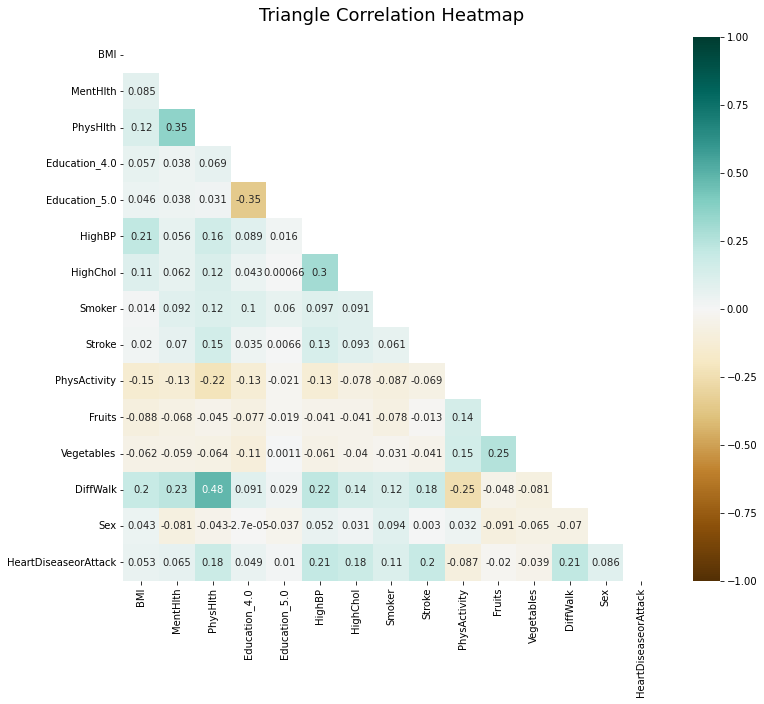

In [25]:
selected_columns = selected_features.tolist() + ['HeartDiseaseorAttack']

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(preprocessed_df[selected_columns].corr()))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(preprocessed_df[selected_columns].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [6]:
# selected_features

Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')

Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')

The selected_features variable contains a pandas Index object that represents the column labels of the selected features after applying feature selection with the Random Forest Classifier model.

In this case, the selected features are 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', and 'Income'. These are the columns that had importance scores greater than or equal to the mean importance score of all features.

The importance score is a metric that measures the relative importance of each feature in a machine learning model. The score indicates how much a feature contributes to the prediction of the target variable. In other words, it helps to identify which features are most relevant or informative for making accurate predictions.

### Inspect the balance of the dataset

In [27]:
print(preprocessed_df['HeartDiseaseorAttack'].value_counts())

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

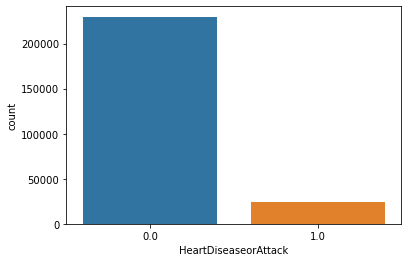

In [28]:
sns.countplot(x='HeartDiseaseorAttack', data=preprocessed_df)

# Setting up the different train and test sets to be used

In [30]:
# split data into training and testing data sets, use processed X
# use all of the features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_processed, y, test_size = 0.2, random_state=seed)

# use the features identified by feature selection
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_processed[selected_features], y, test_size = 0.2, random_state=seed)

# set different class weights
wt1 = {0:1, 1:2}
wt2 = {0:1, 1:5}
wt3 = {0:1, 1:10}

# Logistic Regression

### Logistic regression using all features

Using all features and no class weights

In [34]:
# logistic regression with all features
logreg_all = LogisticRegression(max_iter=10000)
logreg_all.fit(X_train_all, y_train_all)
y_pred_all = logreg_all.predict(X_test_all)

print('Accuracy:', accuracy_score(y_test_all, y_pred_all))
print('Precision:', precision_score(y_test_all, y_pred_all))
print('Recall:', recall_score(y_test_all, y_pred_all))
print('ROC AUC:', roc_auc_score(y_test_all, y_pred_all))

Accuracy: 0.9083688111005992
Precision: 0.5528888888888889
Recall: 0.1304530201342282
ROC AUC: 0.5597553127124326


Using all features and 2:1 class weight

In [35]:
# logistic regression with the class weight
logreg_all_wt1 = LogisticRegressionCV(class_weight=wt1, cv=10, max_iter=10000)

# train model with 2:1 class weight ratio and evaluate model on test set
logreg_all_wt1.fit(X_train_all, y_train_all)
y_pred_all_wt1 = logreg_all_wt1.predict(X_test_all)

print('Accuracy:', accuracy_score(y_test_all, y_pred_all_wt1))
print('Precision:', precision_score(y_test_all, y_pred_all_wt1))
print('Recall:', recall_score(y_test_all, y_pred_all_wt1))
print('ROC AUC:', roc_auc_score(y_test_all, y_pred_all_wt1))

Accuracy: 0.9066934720908231
Precision: 0.5237430167597765
Recall: 0.0786493288590604
ROC AUC: 0.5356155624455413


Using all features and 5:1 class weight

In [37]:
# logistic regression with the class weight
logreg_all_wt2 = LogisticRegressionCV(class_weight=wt2, cv=10, max_iter=10000)

# train model with 5:1 class weight ratio and evaluate model on test set
logreg_all_wt2.fit(X_train_all, y_train_all)
y_pred_all_wt2 = logreg_all_wt2.predict(X_test_all)

print('Accuracy:', accuracy_score(y_test_all, y_pred_all_wt2))
print('Precision:', precision_score(y_test_all, y_pred_all_wt2))
print('Recall:', recall_score(y_test_all, y_pred_all_wt2))
print('ROC AUC:', roc_auc_score(y_test_all, y_pred_all_wt2))

Accuracy: 0.8554872280037843
Precision: 0.32004491858506456
Recall: 0.47818791946308725
ROC AUC: 0.6864051327214497


Using all features and 10:1 class weight

In [39]:
# logistic regression with the class weight
logreg_all_wt3 = LogisticRegressionCV(class_weight=wt3, cv=10, max_iter=10000)

# train model with 10:1 class weight ratio and evaluate model on test set
logreg_all_wt3.fit(X_train_all, y_train_all)
y_pred_all_wt3 = logreg_all_wt3.predict(X_test_all)

print('Accuracy:', accuracy_score(y_test_all, y_pred_all_wt3))
print('Precision:', precision_score(y_test_all, y_pred_all_wt3))
print('Recall:', recall_score(y_test_all, y_pred_all_wt3))
print('ROC AUC:', roc_auc_score(y_test_all, y_pred_all_wt3))

Accuracy: 0.7501182592242195
Precision: 0.24490454076367388
Recall: 0.7963506711409396
ROC AUC: 0.7708367522081307


### Logistic regression using selected features

Using selected features and no class weights

In [41]:
# logistic regression with selected features
logreg_sel = LogisticRegression(max_iter=10000)
logreg_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = logreg_sel.predict(X_test_sel)

print('Accuracy:', accuracy_score(y_test_sel, y_pred_sel))
print('Precision:', precision_score(y_test_sel, y_pred_sel))
print('Recall:', recall_score(y_test_sel, y_pred_sel))
print('ROC AUC:', roc_auc_score(y_test_sel, y_pred_sel))

Accuracy: 0.9067526017029328
Precision: 0.5240572171651495
Recall: 0.08452181208053691
ROC AUC: 0.5382798757583332


Using selected features and 2:1 class weight

In [42]:
# logistic regression with the class weight
logreg_sel_wt1 = LogisticRegressionCV(class_weight=wt1, cv=10, max_iter=10000)

# train model with 2:1 class weight ratio and evaluate model on test set
logreg_sel_wt1.fit(X_train_sel, y_train_sel)
y_pred_sel_wt1 = logreg_sel_wt1.predict(X_test_sel)

print('Accuracy:', accuracy_score(y_test_sel, y_pred_sel_wt1))
print('Precision:', precision_score(y_test_sel, y_pred_sel_wt1))
print('Recall:', recall_score(y_test_sel, y_pred_sel_wt1))
print('ROC AUC:', roc_auc_score(y_test_sel, y_pred_sel_wt1))

Accuracy: 0.9059839167455062
Precision: 0.4979508196721312
Recall: 0.05096476510067114
ROC AUC: 0.5228174852304608


Using selected features and 5:1 class weight

In [43]:
# logistic regression with the class weight
logreg_sel_wt2 = LogisticRegressionCV(class_weight=wt2, cv=10, max_iter=10000)

# train model with 2:1 class weight ratio and evaluate model on test set
logreg_sel_wt2.fit(X_train_sel, y_train_sel)
y_pred_sel_wt2 = logreg_sel_wt2.predict(X_test_sel)

print('Accuracy:', accuracy_score(y_test_sel, y_pred_sel_wt2))
print('Precision:', precision_score(y_test_sel, y_pred_sel_wt2))
print('Recall:', recall_score(y_test_sel, y_pred_sel_wt2))
print('ROC AUC:', roc_auc_score(y_test_sel, y_pred_sel_wt2))

Accuracy: 0.8620309050772627
Precision: 0.30765253360910033
Recall: 0.37437080536912754
ROC AUC: 0.6434919637705365


Using selected features and 10:1 class weight

In [44]:
# logistic regression with the class weight
logreg_sel_wt3 = LogisticRegressionCV(class_weight=wt3, cv=10, max_iter=10000)

# train model with 2:1 class weight ratio and evaluate model on test set
logreg_sel_wt3.fit(X_train_sel, y_train_sel)
y_pred_sel_wt3 = logreg_sel_wt3.predict(X_test_sel)

print('Accuracy:', accuracy_score(y_test_sel, y_pred_sel_wt3))
print('Precision:', precision_score(y_test_sel, y_pred_sel_wt3))
print('Recall:', recall_score(y_test_sel, y_pred_sel_wt3))
print('ROC AUC:', roc_auc_score(y_test_sel, y_pred_sel_wt3))

Accuracy: 0.7213418479974771
Precision: 0.2141898487066862
Recall: 0.7363674496644296
ROC AUC: 0.728075388598313


Accuracy measures the number of correct predictions made by the model compared to all predictions. However, the high accuracy score can be misleading in imbalanced datasets where one class is much more frequent than the others. This is the case in this dataset (229,787 no heart-disease, 23,893 heart-disease). If the model would always predict the majority class (no heart-disease) can have a high accuracy but still fail to capture the minority class (heart-disease).

Precision measures how well a model can predict positive examples. It is a useful metric when the cost of false positives is high.

The recall measures how well a model can identify positive examples. It is a useful metric when the cost of false negatives is high.

AUC is a metric suited for imbalanced datasets. AUC measures the overall performance of a binary classifier by computing the area under the ROC curve, which plots the true positive rate against the false positive rate for different classification thresholds. A high AUC score indicates that the classifier is able to distinguish between the positive and negative classes effectively, regardless of the class distribution. This makes the AUC an important mectric in this case. Measuring the AUC, the model is performing very badly. It has a AUC score of 0.5, which is the same as it would be randomly guessing.

The ROC AUC is still very low, even after altering the weight. Therefore, we will continue building the model including all features. 

# Clustering

Using all features

In [49]:
# Create k-mean object
clt = KMeans(n_clusters=3, random_state=0) #, n_jobs=-1)

# Train model
model = clt.fit(X_processed)
labels = model.predict(X_processed)

In [50]:
silhouette = silhouette_score(X_processed, labels)
silhouette

0.1091525153457679

In [ ]:
# Define a range of possible number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize the silhouette scores list
silhouette_scores = []

# Loop over the range of possible number of clusters
for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    model = KMeans(n_clusters=n_clusters, random_state=0)
    
    # Fit the model to the data
    model.fit(X_processed)
    
    # Predict the cluster labels for each data point
    labels = model.predict(X_processed)
    
    # Calculate the silhouette score
    silhouette_score_ = silhouette_score(X_processed, labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_score_)

# Find the number of clusters with the highest silhouette score
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]

print("The optimal number of clusters is:", best_n_clusters)

In [ ]:
# Initialize the KMeans model with best number of clusters
model = KMeans(n_clusters=best_n_clusters, random_state=0)

# Fit the model to the data
model.fit(X_processed)

# Predict the cluster labels for each data point
labels = model.predict(X_processed)

# Plot the data points with different colors representing different clusters
for label in np.unique(labels):
    data = X_processed[labels == label]
    plt.scatter(data[:, 0], data[:, 1], label=f"Cluster {label}")

plt.legend()
plt.show()

# Decision Tree Using All Features

In [67]:
X = heart_df.drop('HeartDiseaseorAttack', axis=1) # features
y = heart_df['HeartDiseaseorAttack'] # target variable

# splitting data to understand model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# create decision tree classifier object
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# train decision tree with training data
tree_clf.fit(X_train, y_train)

# predict y for test set
y_pred = tree_clf.predict(X_test)

evaluating the model performance

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.9043545674340376
Precision: 0.46698393813206424
Recall: 0.10951450892857142
ROC AUC: 0.548258472985813


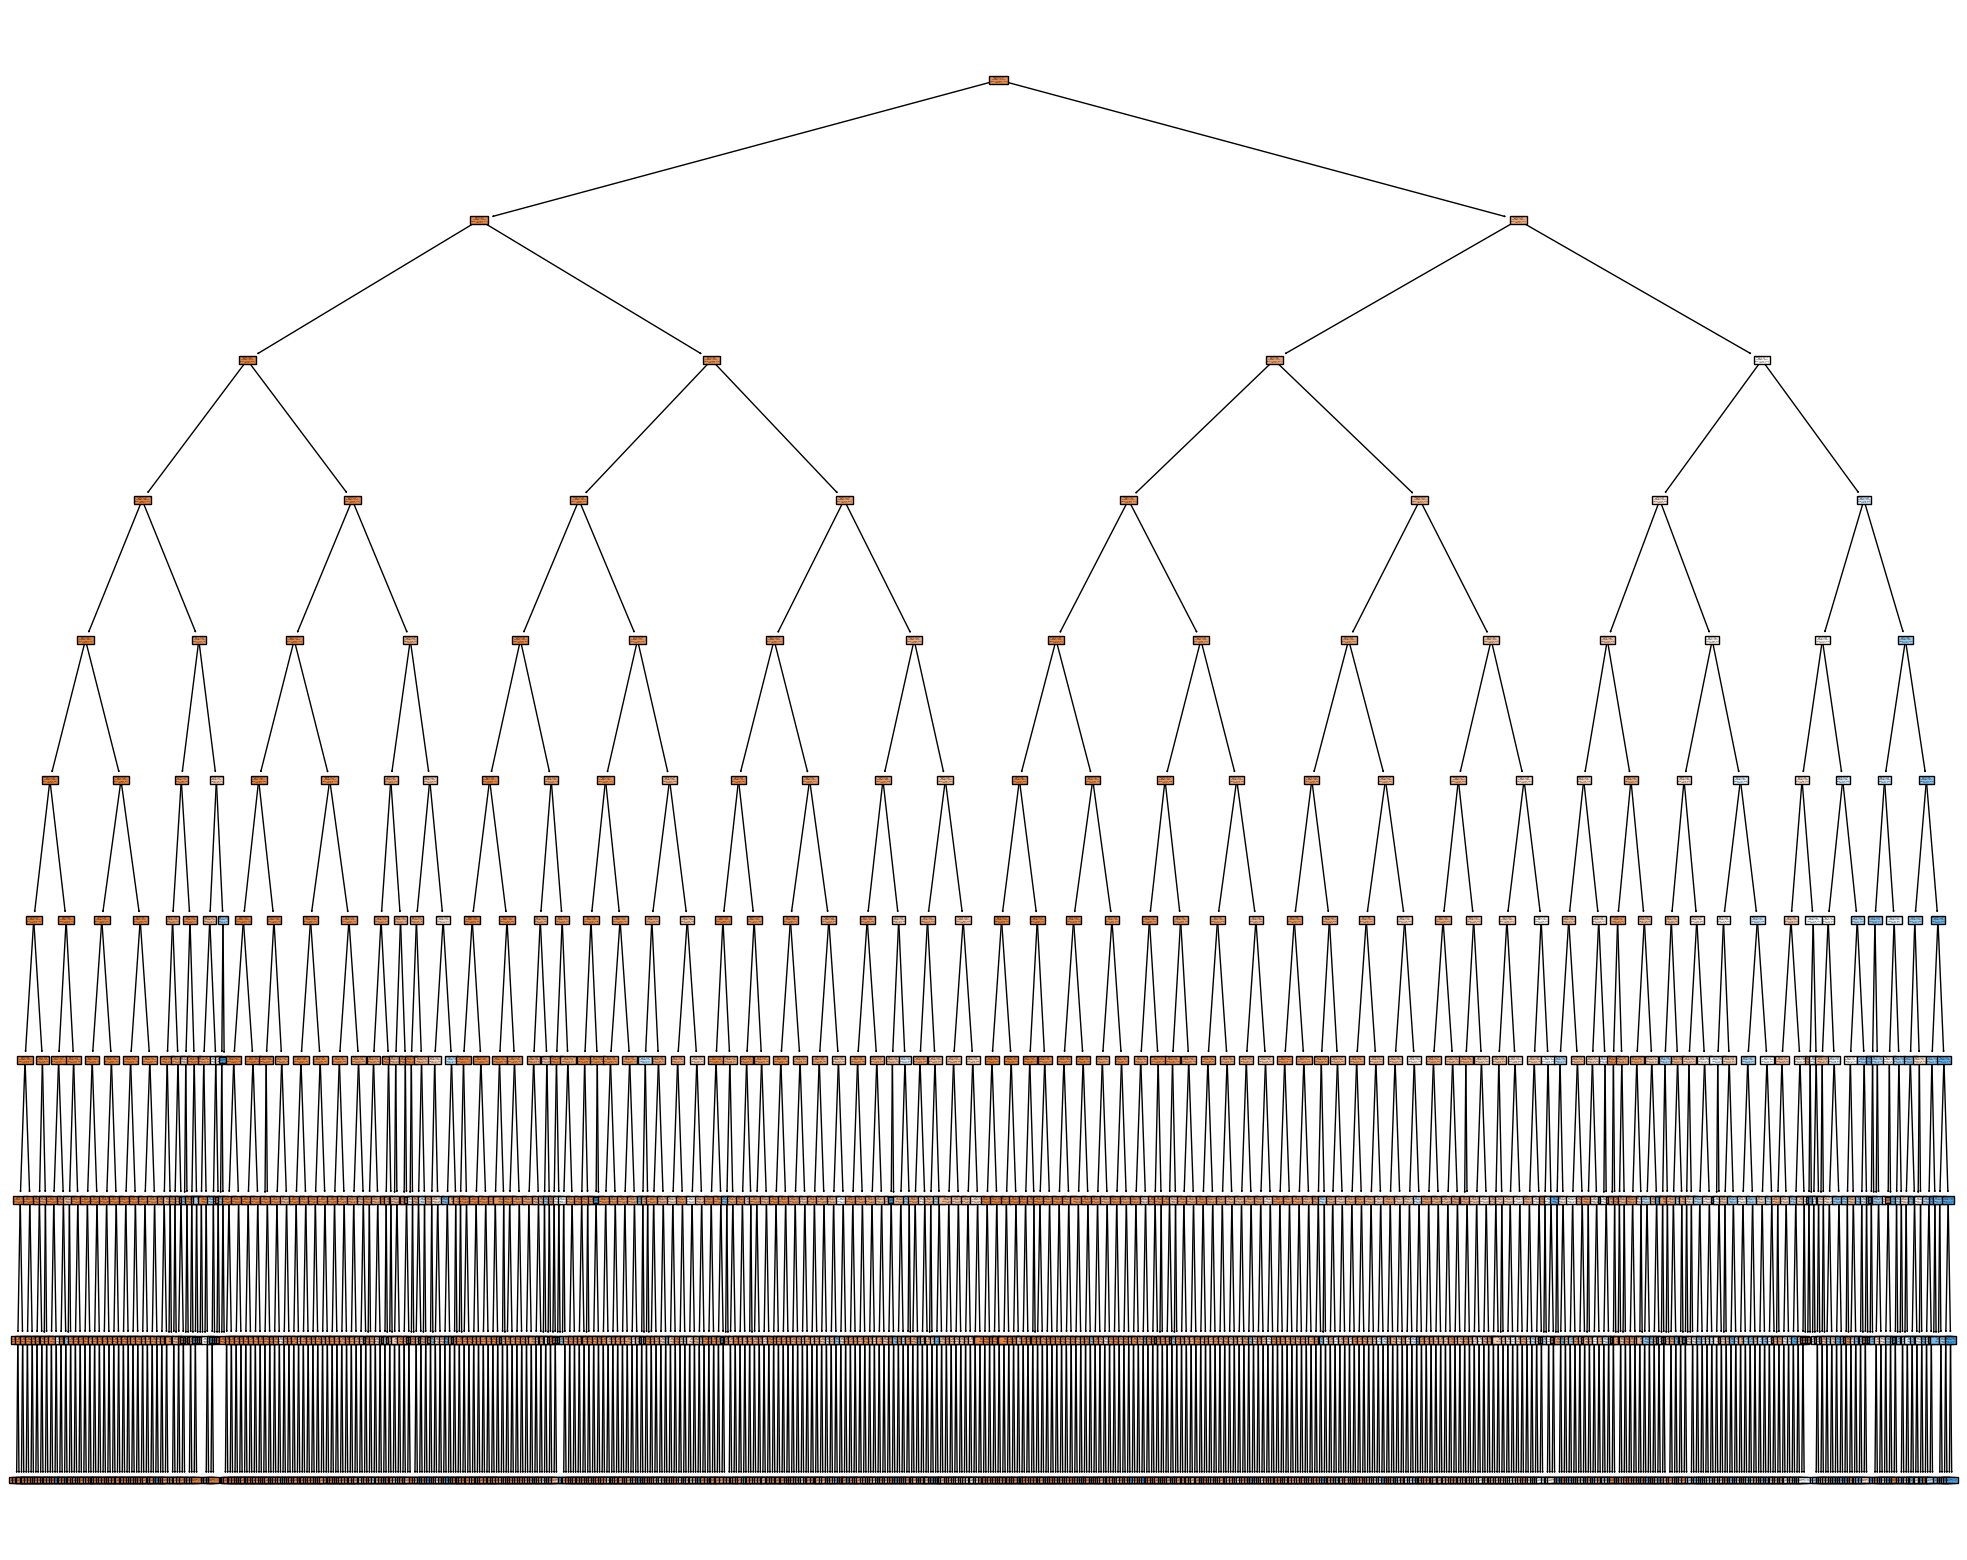

In [70]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=list(X.columns),  
                   class_names=['0','1'],
                   filled=True)

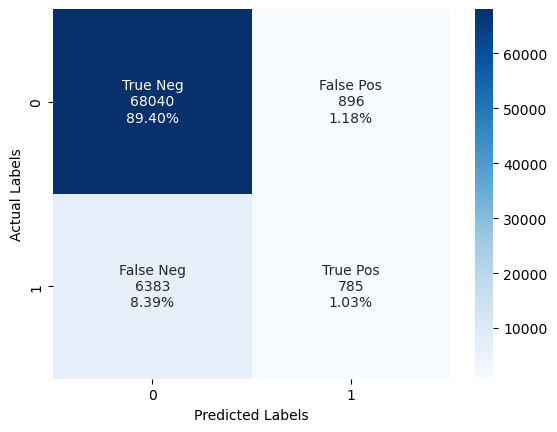

In [76]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Decision Tree using selected features

In [79]:
X = heart_df.drop('HeartDiseaseorAttack', axis=1)
X_sel = selected_df = X[selected_features].copy()

y = heart_df['HeartDiseaseorAttack']

# splitting data to understand model performance
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.3, random_state=1) # 70% training and 30% test

# create decision tree classifier object
tree_clf_sel = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

# train decision tree with training data
tree_clf_sel.fit(X_train, y_train)

# predict y for test set
y_pred = tree_clf_sel.predict(X_test)

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.9037107116577315
Precision: 0.3586572438162544
Recall: 0.0283203125
ROC AUC: 0.5115272793786991


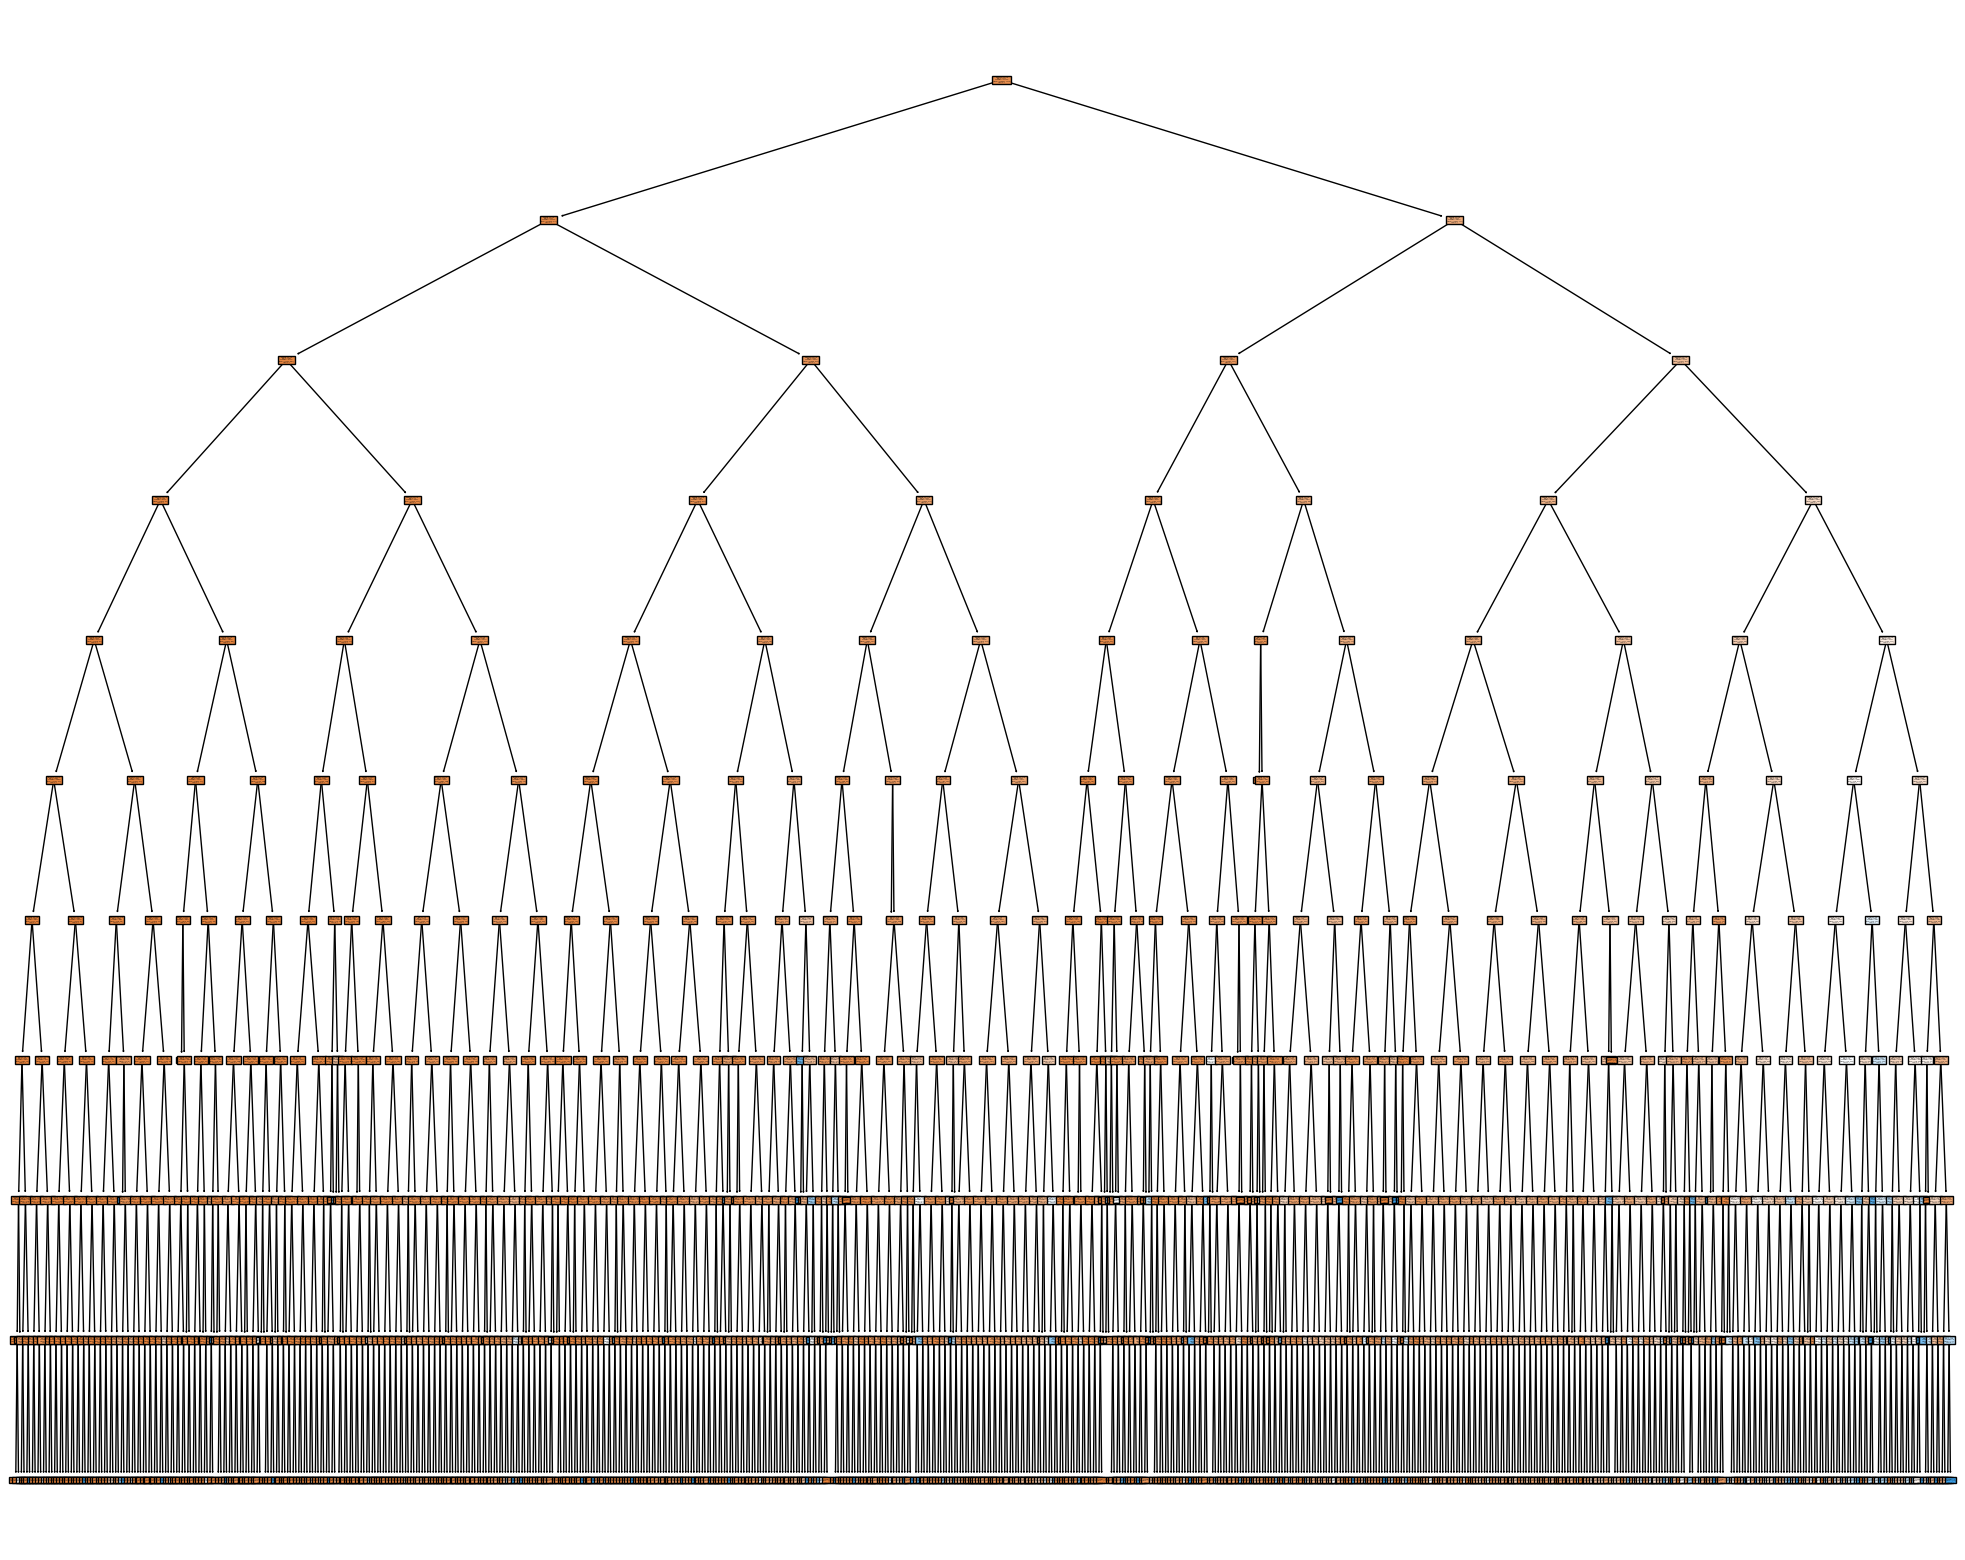

In [81]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf_sel, 
                   feature_names=list(X.columns),  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a decision tree classifier with tuned hyperparameters
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the testing set
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     68884
         1.0       0.26      0.43      0.32      7220

    accuracy                           0.83     76104
   macro avg       0.60      0.65      0.61     76104
weighted avg       0.87      0.83      0.85     76104

